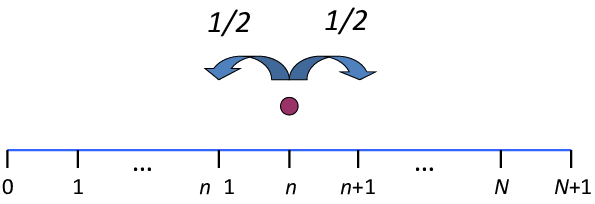

# Random Walk


As a physics student sometimes you see some random movement in nature like brownian motion(it's actually deterministic). we can use stochastic litrature to study brownian motion and find lots of valuable information about this process. Random walk is somehow one of the most instructive models that can help you understand how random process can model the nature.

for the beging let's see what random walk is. according to Wikipedia(https://en.wikipedia.org/wiki/Random_walk) random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

An elementary example of a random walk is the random walk on the integer number line, ${\displaystyle \mathbb {Z} }$ , which starts at 0 and at each step moves +1 or −1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas (see Brownian motion), the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.

We know that you are passionate and want to explore all details of these process(joke :) ) but for the begining let's start with the simplest model, one dimensional random walk with same probability for right and left step.

1. the simplest model of random walk is a One-dimensional random walk, which starts at 0 and at each step moves +1 or −1 with equal probability. consider 10000_step 1d random walk. and use $10^5$ ensemble. in each ensemble begin from the origin(0) and record the endpoint at 10000th step. plot the PDF of these endpoints. also, calculate the first four moments of this PDF.

In [ ]:
#code here

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, kurtosis

In [2]:
ens = 100000
step = 10000
nbin = 40

In [3]:
final_step = np.zeros(ens)

In [4]:
for i in range(ens):
    ranPt = np.array(np.random.random((1, step)))
    a = len(np.where(ranPt >= 1/2)[0])
    b = step - a 
    final_step[i] = a - b

In [5]:
maxDis = max(final_step)
minDis = min(final_step)
binS = np.linspace(minDis, maxDis, nbin)

pdf_final, binsPdf = np.histogram(final_step, binS, density = True)

In [7]:
mean_final =  np.mean(final_step)
print('mean: ', mean_final)

var_final = np.var(final_step)
print('variance: ', var_final)

skew_final = skew(final_step)
print('skewness: ', skew_final)

kurt_final = kurtosis(final_step)
print('kurtosis: ', kurt_final)

mean:  0.1725
variance:  9933.566763750001
skewness:  -0.013871061435354156
kurtosis:  -0.01798874208764145


now look at the plot you create. does it looklike a normal distribution? if yes isn't it strange cause we know that the probability is bionomial not guassian.


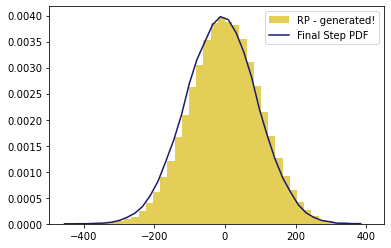

In [360]:
rG = np.random.normal(loc = mean_final, scale = np.sqrt(var_final), size=ens)

plt.hist(rG, nbin, density = True, color = '#E3CF57', label = 'RP - generated!')
plt.plot(binS[0:-1], pdf_final, color = '#191970', label = 'Final Step PDF')
plt.legend()

plt.show()

In [ ]:
#explain here

In [ ]:
# The normal distribution can be used as an approximation to the binomial distribution, 
# under certain circumstances, namely: If X ~ B(n, p) and if n is large and/or p is close to ½, 
# then X is approximately N(np, npq)
# توزیع نرمال می تواند به عنوان تخمینی از توزیع دوجمله ای استفاده شود اگر تعداد انتخاب ها بزرگ شود.

2.change the probability of jumping to right and left in a way that $P_{left} = 2 P_{right}$ and then repeat the process of Q1 again and evaluate the PDF and first four moments and cumulants. 

In [ ]:
#code here

In [9]:
final_step2 = np.zeros(ens)

In [10]:
for i in range(ens):
    ranPt = np.array(np.random.random((1, step)))
    a = len(np.where(ranPt >= 2/3)[0])
    b = step - a 
    final_step2[i] = a - b

In [11]:
maxDis2 = max(final_step2)
minDis2 = min(final_step2)
binS2 = np.linspace(minDis2, maxDis2, nbin)

pdf_final2, binsPdf2 = np.histogram(final_step2, binS2, density = True)

In [12]:
mean_final2 =  np.mean(final_step2)
print('mean: ', mean_final2)

var_final2 = np.var(final_step2)
print('variance: ', var_final2)

skew_final2 = skew(final_step2)
print('skewness: ', skew_final2)

kurt_final2 = kurtosis(final_step2)
print('kurtosis: ', kurt_final2)

mean:  -3333.36242
variance:  8861.8564917436
skewness:  0.010656909585879002
kurtosis:  -0.00916674785848004


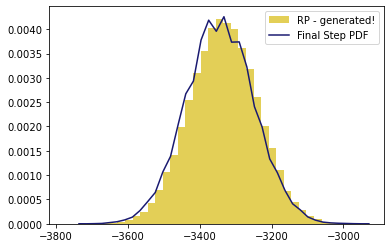

In [362]:
rG2 = np.random.normal(loc = mean_final2, scale = np.sqrt(var_final2), size=ens)

plt.hist(rG2, nbin, density = True, color = '#E3CF57', label = 'RP - generated!')
plt.plot(binS2[0:-1], pdf_final2, color = '#191970', label = 'Final Step PDF')
plt.legend()

plt.show()

according to your result, can you tell how the shape of PDF function related to its cumulants?

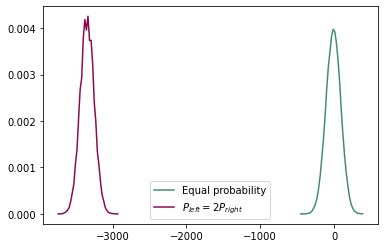

In [18]:
plt.plot(binS[0:-1], pdf_final, color = '#458B74', label = 'Equal probability')
plt.plot(binS2[0:-1], pdf_final2, color = '#8B0A50', label = '$P_{left} = 2 P_{right}$')
plt.legend(fontsize = 10)
plt.show()

In [ ]:
#explain here

In [ ]:
# کامیولنت ها - و یا ممان ها را می توان به عنوان پایه هایی در نظر گرفت که شکل یک تابع را بر اساس آن ها بسط می دهیم. بنابراین اطلاعاتی 
# که در هر کدام از آن ها نشسته است بخشی از شکل را مشخص می کند. البته بسط بر اساس این پایه ها با بسط هایی مانند بسط فوریه چند تفاوت عمده 
# دارند، که می توان به یکنوا نبودن کاهش اهمیت با جلو رفتن در مراتب بسط - ممان های بالاتر - و هم چنین عدم آگاهی از این که چه میزان اطلاعات در هر 
# بسط نشسته است اشاره کرد.

# Conditional Probability


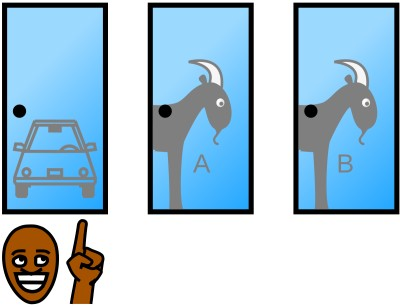

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? if Yes write a it's code to tell Us why and if your answer is No code it to prove the first group they are wrong:)

In [ ]:
#code here - Always Switch!!!!

In [91]:
win = 0 
num = 1000

for i in range(num):

    flag = [False, False, False]
    rand1 = np.random.uniform(0,1)
    if rand1 <= 1/3:
        flag[0] = True
    elif rand1 > 2/3:
        flag[2] = True
    else:
        flag[1] = True

    choice = -1
    rand2 = np.random.uniform(0,1)
    if rand2 <= 1/3:
        choice = 0
    elif rand2 > 2/3:
        choice = 2
    else:
        choice = 1

    if flag[choice] == False:
        win = win + 1

winp = win/num * 100
print('Chance to be winner:', winp, '%')

Chance to be winner: 67.5 %


# Centeral limit theorem

Choose a non-Gaussian distribution (uniform/bionomial/poission) and generate $10^5$ random variables for each of them.                                                      
a) plot the PDF of samples you created .                                                   
b) create $10^4$ random subset of length {2 , 5 , 10 , 20 , 100} from the first non-Gaussian distribution and caclculate mean of each subset, then plot the PDF of these means.                                                                       
c) what do you understand form comparing the original distribution with those five?


In [172]:
#code here
import random

In [173]:
numP = 100000
numEns = 10000
leng = 5
lengl = [2, 5, 10, 20, 100]

In [178]:
# Uniform

ranPtU = np.array(np.random.random((1, numP)))
f = np.zeros((leng, numEns))

l = 0 
for i in lengl:
    for j in range(numEns):
        a = random.sample(range(0, 10000), i)
        sumS = 0
        for k in a:
            sumS = sumS + ranPtU[0,k]
        f[l, j] = sumS/i
    l = l + 1

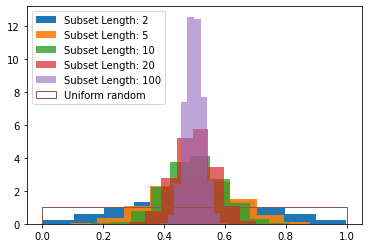

In [179]:
for i in range(leng):
    plt.hist(f[i, :], density = True, alpha = 1- i*0.1, label = 'Subset Length: %s' % lengl[i])
    
plt.hist(ranPtU[0,:], density = True, histtype='step', label = 'Uniform random')
plt.legend(loc = 2)
plt.show()

In [238]:
# Binomial

n, p = 10, .5

ranPtB = np.random.binomial(n, p, numP)
bino = np.zeros((leng, numEns))

l = 0 
for i in lengl:
    for j in range(numEns):
        a = random.sample(range(0, 10000), i)
        sumS = 0
        for k in a:
            sumS = sumS + ranPtB[k]
        bino[l, j] = sumS/i
    l = l + 1

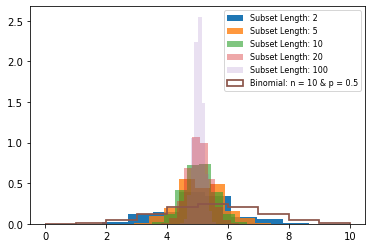

In [242]:
for i in range(leng):
    plt.hist(bino[i, :], density = True, alpha = 1 - (i)*0.2, label = 'Subset Length: %s' % lengl[i])
    
plt.hist(ranPtB[:], density = True, histtype='step', lw =1.75, label = 'Binomial: n = 10 & p = 0.5')
plt.legend(fontsize = 8)
plt.show()

In [217]:
# Poisson

ranPtP = np.random.poisson(5, numP)
poi = np.zeros((leng, numEns))

l = 0 
for i in lengl:
    for j in range(numEns):
        a = random.sample(range(0, 10000), i)
        sumS = 0
        for k in a:
            sumS = sumS + ranPtP[k]
        poi[l, j] = sumS/i
    l = l + 1

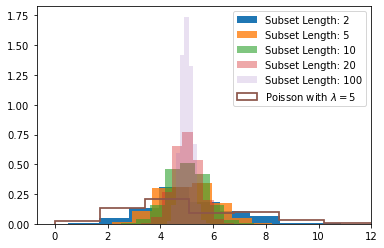

In [232]:
for i in range(leng):
    plt.hist(poi[i, :], density = True, alpha = 1 - (i)*0.2, label = 'Subset Length: %s' % lengl[i])
    
plt.hist(ranPtP[:], density = True, histtype='step', lw =1.75, label = 'Poisson with $\lambda = 5$')
plt.legend(loc = 1)
plt.xlim(-0.7, 12)
plt.show()

In [243]:
# همگی به سمت نرمال پیش رفته اند، و نمایش قضیه حد مرکزی محسوب می شوند

# Poission Approximation

Use python libraries to generate bionomial and poission distributions for different N’s (remember $\lambda =NP$). Over plot them for N = {5, 10, 20, 50, 100, 200, 1000}
How does it behave as N increases? 



In [285]:
#code here 
numRP = 10000
pS = 0.5
nT = [5, 10, 20, 50, 100, 200, 1000, 10000]
nTl = len(nT)

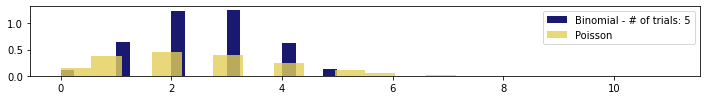

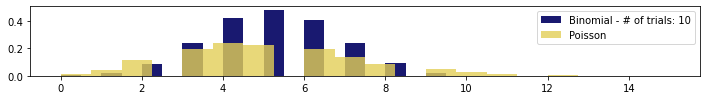

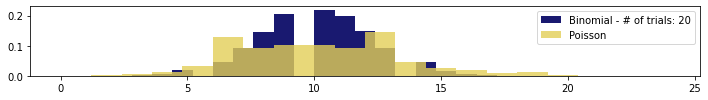

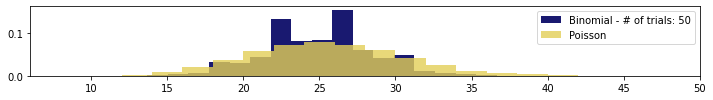

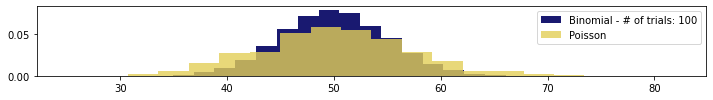

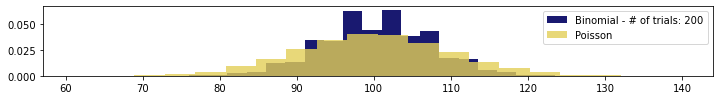

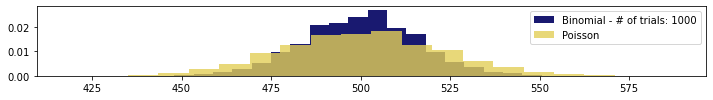

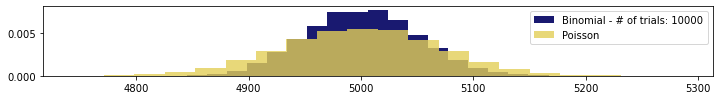

In [286]:
for i in range(nTl):
    ranPtB2 = np.random.binomial(nT[i], pS, numRP)
    ranPtP2 = np.random.poisson(nT[i]* pS, numRP)
    plt.subplots(figsize=(12, 12), sharex=True)
    plt.subplot(nTl, 1, i+1)
    plt.hist(ranPtB2, 20, density = True, color = '#191970', label = 'Binomial - # of trials: %s' %nT[i])
    plt.hist(ranPtP2, 20, density = True, color = '#E3CF57', alpha = 0.8, label = 'Poisson')
    plt.legend()

In [ ]:
# هر دو به سمت یک رفتار همگرا می شوند.

# Box Muller Method

1- generate Normal distribution from uniform distribution (Box-Muller algorithm(https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)- do not need to derive and prove it. the topic will be included in lectures in the following week). Normal= zero mean, unit variance    
a)Sample many points from this distribution. plot the pdf of the sample (plot hist).             
                              


In [11]:
#code here

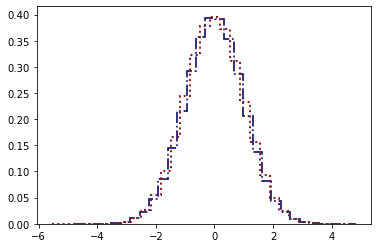

In [306]:
numRPuni = 1000000

ranBM1u = np.array(np.random.random((numRPuni)))
ranBM2u = np.array(np.random.random((numRPuni)))

ranBM1 = np.sqrt(-2 * np.log(ranBM1u)) * np.cos(2 * np.pi * ranBM2u)
ranBM2 = np.sqrt(-2 * np.log(ranBM1u)) * np.sin(2 * np.pi * ranBM2u)

plt.hist(ranBM1, 30, density = True, color = '#191970', histtype='step', linestyle = '-.', lw =1.75)
plt.hist(ranBM2, 30, density = True, color = '#8B1A1A', histtype='step', linestyle = ':', lw = 2)

plt.show()

b)Calculate mean of the sample. Its variance.

In [309]:
#code here
# mean
meanBM1 = sum(ranBM1)/numRPuni
meanBM2 = sum(ranBM2)/numRPuni

meanBM1P = np.mean(ranBM1)
meanBM2P = np.mean(ranBM2)

varBM1 = sum((ranBM1-meanBM1)**2)/ (numRPuni -1)
varBM2 =sum((ranBM2-meanBM2)**2)/ (numRPuni -1)

varBM1P = np.var(ranBM1)
varBM2P = np.var(ranBM2)

print(meanBM1, varBM1)
print(meanBM1P, varBM1P)
print(':)')
print(meanBM2, varBM2)
print(meanBM2P, varBM2P)

2.278755455548647e-05 1.0005714959866445
2.278755455548157e-05 1.000570495415149
:)
-0.0010019801777192503 1.0001650238279507
-0.001001980177719267 1.0001640236629226


c)Overplot the pdf now, using this mean and variance (on the plot hist). Also use the mean and std deviation functions from python library. Do they agree?

In [310]:
from scipy.stats import norm

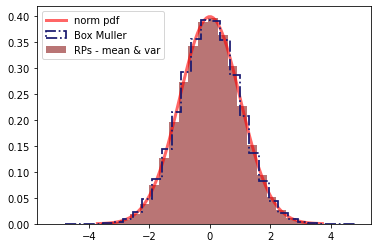

In [323]:
#code here
randG = np.random.normal(loc = meanBM1, scale=np.sqrt(varBM1), size=numRPuni)

x = np.linspace(norm.ppf(0.0001), norm.ppf(0.9999), 100)
plt.plot(x, norm.pdf(x),'r-', lw=3, alpha=0.6, label='norm pdf')

plt.hist(ranBM1, 30, density = True, color = '#191970', histtype='step'
         , linestyle = '-.', lw =1.75, label = 'Box Muller')

plt.hist(randG, 30, density = True, color = '#8B1A1A', alpha = 0.6, label = 'RPs - mean & var')

plt.legend(loc = 2)
plt.show()

d)Now that you have your Normal distribution, how can you turn it into a Gaussian distribution with  given mean and variance? For example mean=2, and std dev=4 ?   

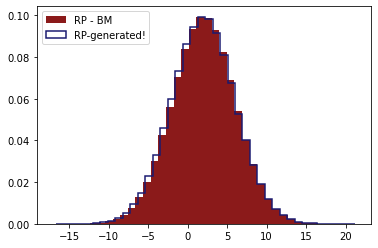

In [356]:
#code here

new_mean = 2
new_std = 4

randG24 = new_std * ranBM1 + new_mean

randG24P = np.random.normal(loc = new_mean, scale = new_std, size=numRPuni)

plt.hist(randG24, 40, density = True, color = '#8B1A1A', label = 'RP - BM')
plt.hist(randG24P, 40, density = True, color = '#191970', histtype='step', lw =1.5, label = 'RP-generated!')

plt.legend(loc = 2)
plt.show()

there are two problems left, but you can choose one of them to solve.(we highly recommend you to solve both of them)

# Nice Matrix

A matrix of size n$\times$n which include numbers of {1,2,3,...,$n^2$} is called nice, if sum of all rows and columns  are the same. write a code that get n as a input and return a n$\times$n Nice Matrix. print out the examples of Nice Matrix for n = 4,5,6

In [332]:
#code here - #GeeksForGeeks 
def generateSquare(n):
 
    # 2-D array with all
    # slots set to 0
    magicSquare = [[0 for x in range(n)]
                   for y in range(n)]
 
    # initialize position of 1
    i = n // 2
    j = n - 1
 
    # Fill the magic square
    # by placing values
    num = 1
    while num <= (n * n):
        if i == -1 and j == n:  # 3rd condition
            j = n - 2
            i = 0
        else:
 
            # next number goes out of
            # right side of square
            if j == n:
                j = 0
 
            # next number goes
            # out of upper side
            if i < 0:
                i = n - 1
 
        if magicSquare[int(i)][int(j)]:  # 2nd condition
            j = j - 2
            i = i + 1
            continue
        else:
            magicSquare[int(i)][int(j)] = num
            num = num + 1
 
        j = j + 1
        i = i - 1  # 1st condition
 
    # Printing magic square
    print("Magic Square for n =", n)
    print("Sum of each row or column",
          n * (n * n + 1) // 2, "\n")
 
    for i in range(0, n):
        for j in range(0, n):
            print('%2d ' % (magicSquare[i][j]),
                  end='')
 
            # To display output
            # in matrix form
            if j == n - 1:
                print()
 
# Driver Code
 
 
# Works only when n is odd
n = 7
generateSquare(n)

Magic Square for n = 7
Sum of each row or column 175 

20 12  4 45 37 29 28 
11  3 44 36 35 27 19 
 2 43 42 34 26 18 10 
49 41 33 25 17  9  1 
40 32 24 16  8  7 48 
31 23 15 14  6 47 39 
22 21 13  5 46 38 30 


# Honest and Liers

Suppose there 16 People sit around a circular table.  ٍEach claims that the two people next to him/her are liars. How many liars are there in the crowd? 

In [ ]:
#code here